## Data Analytics

#### Load and read data

In [5]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#load data
df = pd.read_csv("cardio.csv", sep=";")

#### Data preprocessing

In [7]:
#display rows and columns of data
df.shape

(70000, 13)

In [8]:
#display data
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [9]:
#display basic statistical details
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#print full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
#display columns
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
#check number of rows where particular columns of null values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
#convert age from days to years 
df["age"] = (df["age"] / 365).astype(int)

In [14]:
#BMI= weight(kg)/height(m)**2
#convert height(cm) into (m), km(1000)>m(100)>cm(10)>mm
df["height"] = df["height"]/100

#pulse pressure = systolic pressure - diastolic pressure
df["Pulse Pressure"] = df["ap_hi"] - df["ap_lo"]

#create a new column named as "BMI"
df["BMI"]= (df["weight"] / df["height"] ** 2).astype(int)


#create a new column named as "HRmax"
df["HRmax"] = (220 - 0.7 * df["age"]).astype(int)


#create a new column named as "MAP"
df["MAP"] = ((df["ap_hi"] + (2 * df["ap_lo"])) / 3).astype(int)

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Pulse Pressure,BMI,HRmax,MAP
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,30,21,185,90
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,50,34,181,106
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,60,23,184,90
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,50,28,186,116
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,40,23,187,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0,40,26,183,93
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50,50,177,106
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,90,31,183,120
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,55,27,177,98


In [15]:
#drop selected column
df.drop(columns=["id"], inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Pulse Pressure,BMI,HRmax,MAP
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,30,21,185,90
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,50,34,181,106
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,60,23,184,90
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,50,28,186,116
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,40,23,187,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,1.68,76.0,120,80,1,1,1,0,1,0,40,26,183,93
69996,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50,50,177,106
69997,52,2,1.83,105.0,180,90,3,1,0,1,0,1,90,31,183,120
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,55,27,177,98


#### Exploratory data analysis

In [16]:
#find sum of cardio for each gender
cardiosum = df.groupby("gender")["cardio"].sum()
cardiosum 

gender
1    22616
2    12363
Name: cardio, dtype: int64

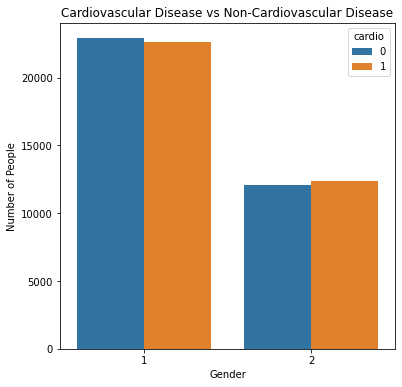

In [17]:
#count plot
plt.figure(figsize=(6,6))
sns.countplot(x="gender", data=df, hue="cardio")
plt.title("Cardiovascular Disease vs Non-Cardiovascular Disease",fontsize=12)
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()

In [18]:
#sum of each gender
df["gender"].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

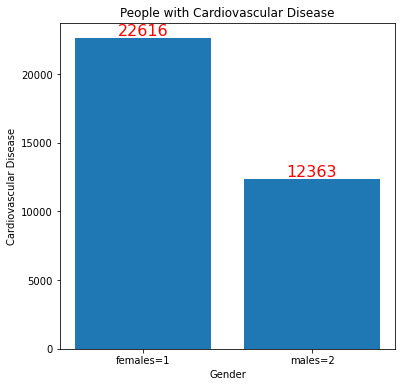

In [19]:
#count plot
plt.figure(figsize=(6,6))
gender = ["females=1", "males=2"]
plt.bar(gender, cardiosum)
plt.title("People with Cardiovascular Disease",fontsize=12)
plt.xlabel("Gender")
plt.ylabel("Cardiovascular Disease")

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), "%d" % int(p.get_height()),
    fontsize=16, color="red", ha="center", va="bottom")

plt.show()

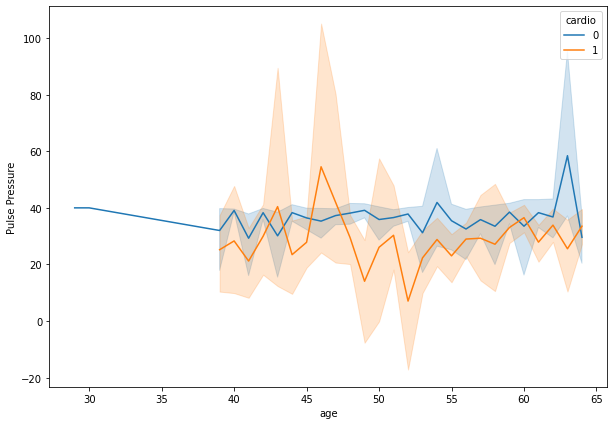

In [20]:
#line plot
plt.figure(figsize=(10,7))
sns.lineplot(x="age", y="Pulse Pressure", hue="cardio", data=df)
plt.show()

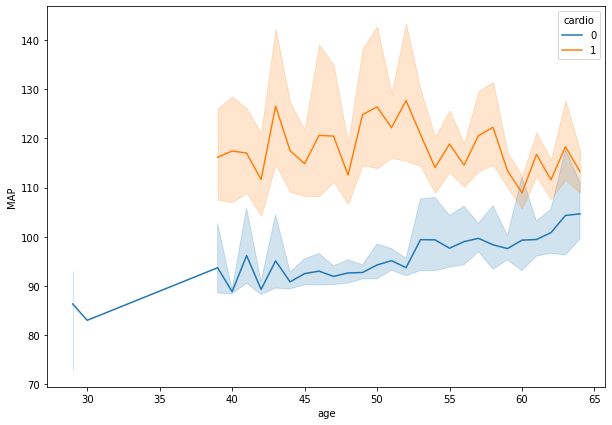

In [21]:
#line plot
plt.figure(figsize=(10,7))
sns.lineplot(x="age", y="MAP", hue="cardio", data=df)
plt.show()

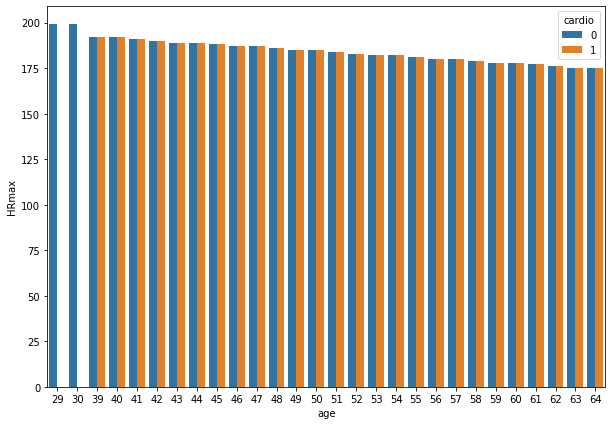

In [22]:
#line plot
plt.figure(figsize=(10,7))
sns.barplot(x="age", y="HRmax", hue="cardio", data=df)
plt.show()

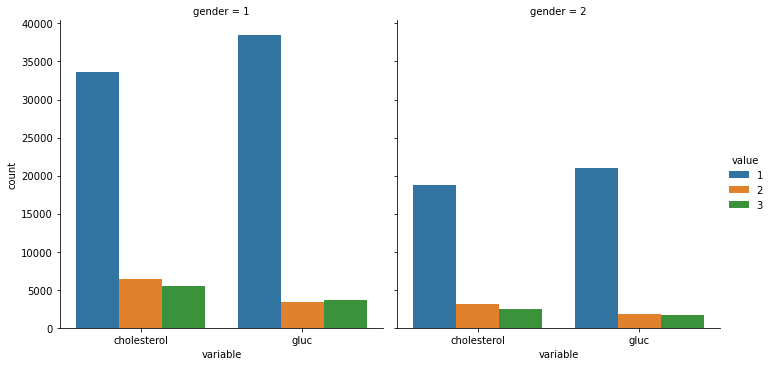

In [23]:
#categorical plot
df_diseases = pd.melt(df, id_vars=["gender"], value_vars=["cholesterol", "gluc"])
sns.catplot(x="variable", hue="value", col="gender",data=df_diseases, kind="count")
plt.show()

In [24]:
#gender with higher cholesterol
df.groupby("gender")["cholesterol"].sum()

gender
1    63047
2    32634
Name: cholesterol, dtype: int64

In [25]:
#gender with higher glucose
df.groupby("gender")["gluc"].sum()

gender
1    56232
2    29620
Name: gluc, dtype: int64

<Figure size 432x432 with 0 Axes>

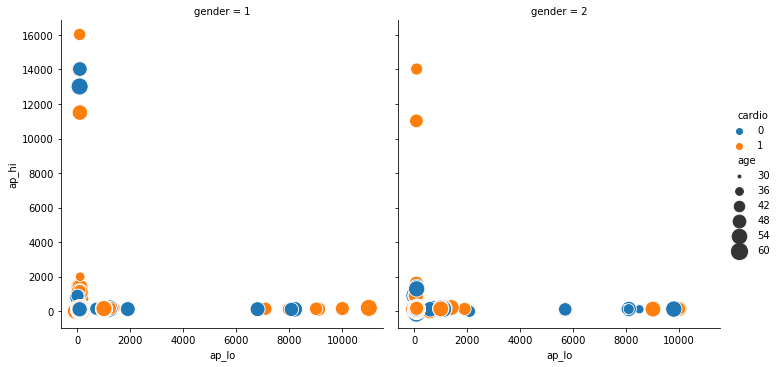

In [26]:
#relationships plot
plt.figure(figsize=(6,6))
sns.relplot(x="ap_lo", y="ap_hi", 
            hue="cardio", 
            size="age", 
            sizes=(0,300), 
            col="gender", 
            data=df)
plt.show()

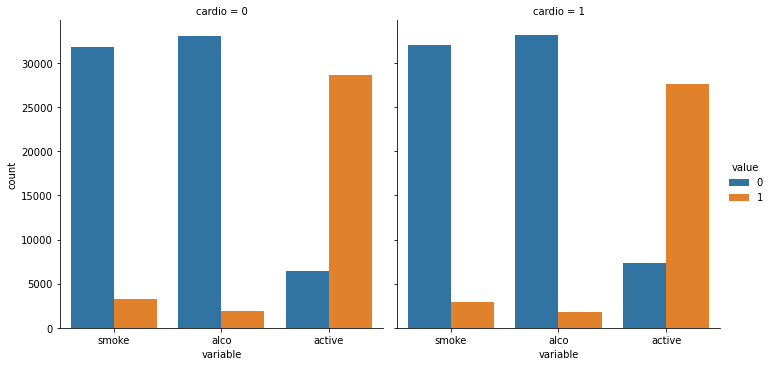

In [27]:
#categorical plot
df_lifestyles = pd.melt(df, id_vars=["cardio"], value_vars=["smoke", "alco", "active"])
sns.catplot(x="variable", hue="value", col="cardio",data=df_lifestyles, kind="count")
plt.show()

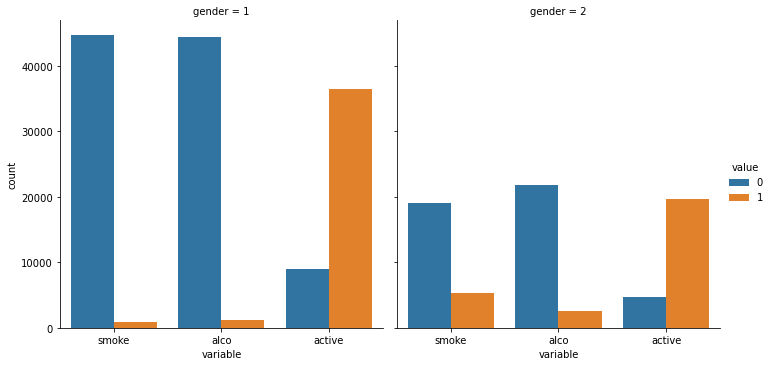

In [28]:
#categorical plot
df_lifestyles = pd.melt(df, id_vars=["gender"], value_vars=["smoke", "alco", "active"])
sns.catplot(x="variable", hue="value", col="gender",data=df_lifestyles, kind="count")
plt.show()

In [29]:
#gender with higher smoking rate
df.groupby("gender")["smoke"].sum()

gender
1     813
2    5356
Name: smoke, dtype: int64

In [30]:
#gender with higher alcohol intake
df.groupby("gender")["alco"].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [31]:
#gender with least exercise rate
df.groupby("gender")["active"].sum()

gender
1    36516
2    19745
Name: active, dtype: int64

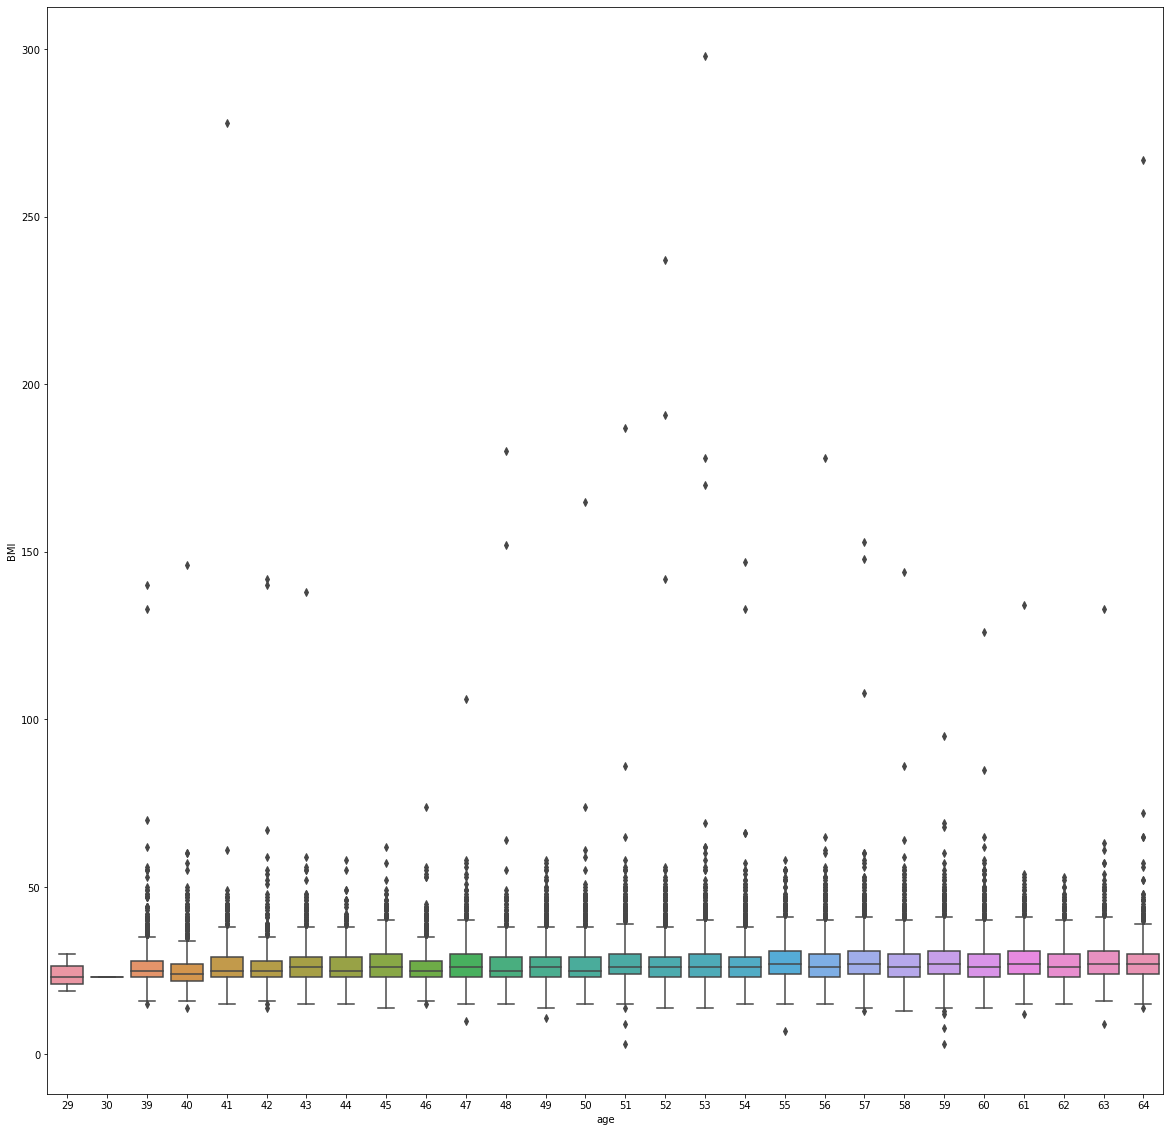

In [32]:
#boxplot
plt.figure(figsize=(20,20))
sns.boxplot(x='age', y='BMI', data=df)
plt.show()

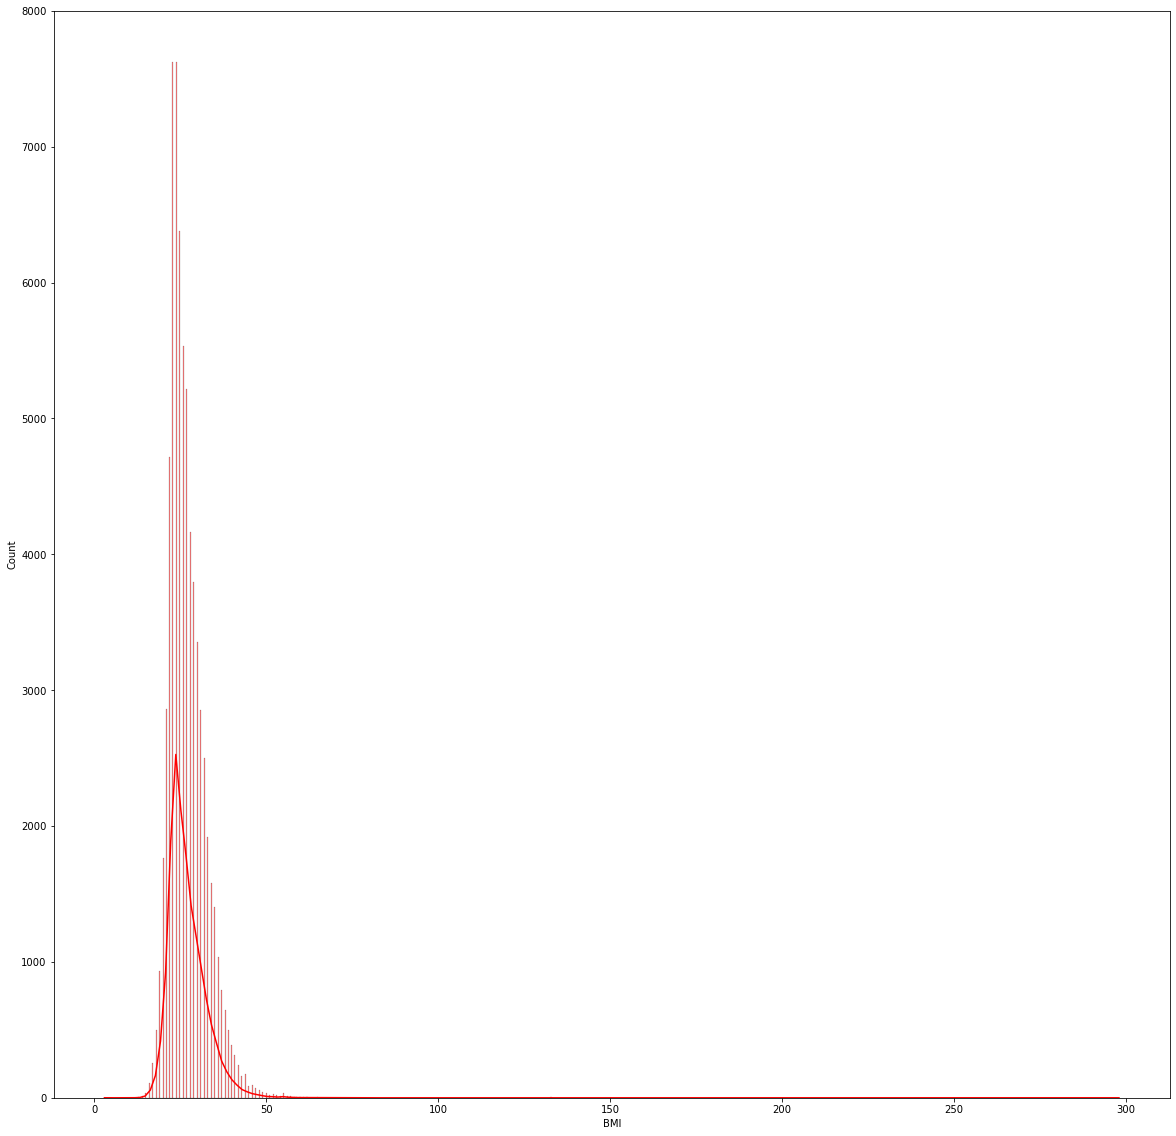

In [33]:
#relationships plot
plt.figure(figsize=(20,20))
sns.histplot(data=df, x="BMI", kde=True, color="red")
plt.show()

## Predictive Analytics (Machine Learning)

#### Logistic regression

In [34]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
# display data first five rows
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Pulse Pressure,BMI,HRmax,MAP
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,30,21,185,90
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,50,34,181,106
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,60,23,184,90
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,50,28,186,116
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,40,23,187,73


In [36]:
# display columns
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'Pulse Pressure', 'BMI',
       'HRmax', 'MAP'],
      dtype='object')

In [37]:
#take category column and apply lambda function check return 1 if BMI >23 else 0
#create a new column
df['Health_Status'] = df['BMI'].apply(lambda x: 1 if x>23 else 0)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Pulse Pressure,BMI,HRmax,MAP,Health_Status
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,30,21,185,90,0
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,50,34,181,106,1
2,51,1,1.65,64.0,130,70,3,1,0,0,0,1,60,23,184,90,0
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,50,28,186,116,1
4,47,1,1.56,56.0,100,60,1,1,0,0,0,0,40,23,187,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,1.68,76.0,120,80,1,1,1,0,1,0,40,26,183,93,1
69996,61,1,1.58,126.0,140,90,2,2,0,0,1,1,50,50,177,106,1
69997,52,2,1.83,105.0,180,90,3,1,0,1,0,1,90,31,183,120,1
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,55,27,177,98,1


In [38]:
#define new dataframe
df_new = df[["BMI","Health_Status"]]
df_new

,BMI,Health_Status
0,21,0
1,34,1
2,23,0
3,28,1
4,23,0
...,...,...
69995,26,1
69996,50,1
69997,31,1
69998,27,1


In [39]:
#use X, y as input and test_size as ratio of spliting > will get 4 parameters back
X_train, X_test, y_train, y_test = train_test_split(df[["BMI"]],df.Health_Status,test_size=0.1)

In [40]:
# data to perform test model
X_test

,BMI
42541,22
57791,23
12492,30
58002,31
47268,31
...,...
30388,29
29202,24
15435,26
22720,27


In [41]:
#data to perform train model
X_train

,BMI
51126,24
46275,30
36833,24
26171,24
68013,34
...,...
11001,28
37906,25
48941,27
32654,22


In [42]:
#create linear regression object
model = LogisticRegression()

In [43]:
#fit to train model
model.fit(X_train, y_train)

LogisticRegression()

In [44]:
#predict data
model.predict(X_test)

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
y_test

42541    0
57791    0
12492    1
58002    1
47268    1
        ..
30388    1
29202    1
15435    1
22720    1
47025    1
Name: Health_Status, Length: 7000, dtype: int64

In [46]:
#check accuracy of model by calling score method
#score will use X_test to predict model.predict(X_test) and compare with y_test value to find accuracy
model.score(X_test, y_test)

1.0

100% accuracy!

In [47]:
model.predict([[55]])

array([1], dtype=int64)